<a href="https://colab.research.google.com/github/binodmathews93/GUVI-DeepLearning/blob/main/SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting Sigmoid Function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

$S_{w,b}(x) = \frac{1}{1+e^{-(wx+b)}}$

In [ ]:
def sigmoid(x,w,b):
  return 1/(1+np.exp(-(w*x+b)))

In [ ]:
sigmoid(2,4,1)

0.9998766054240137

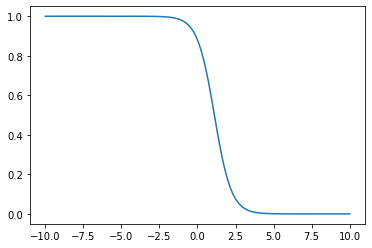

In [ ]:
w = -1.8  #@param {type: "slider", min: -2, max: 2, step:0.1}
b = 2  #@param {type: "slider", min: -2, max: 2, step:0.1}
X = np.linspace( -10, 10 , 100)
Y = sigmoid(X,w,b)

plt.plot(X,Y)
plt.show()

$S_{w_1,w_2,b}(x_1,x_2) = \frac{1}{1+e^{-(w_1x_1+w_2x_2+b)}}$

In [ ]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [ ]:
sigmoid_2d(2,0,4,0,1)

0.9998766054240137

In [ ]:
from mpl_toolkits import mplot3d

In [ ]:
X1 = np.linspace( -10, 10 , 100)
X2 = np.linspace( -10, 10 , 100)

XX1,XX2 = np.meshgrid(X1,X2)

print(X1.shape , X2.shape , XX1.shape , XX2.shape) 


(100,) (100,) (100, 100) (100, 100)


In [ ]:
print(XX2)

[[-10.        -10.        -10.        ... -10.        -10.
  -10.       ]
 [ -9.7979798  -9.7979798  -9.7979798 ...  -9.7979798  -9.7979798
   -9.7979798]
 [ -9.5959596  -9.5959596  -9.5959596 ...  -9.5959596  -9.5959596
   -9.5959596]
 ...
 [  9.5959596   9.5959596   9.5959596 ...   9.5959596   9.5959596
    9.5959596]
 [  9.7979798   9.7979798   9.7979798 ...   9.7979798   9.7979798
    9.7979798]
 [ 10.         10.         10.        ...  10.         10.
   10.       ]]


In [ ]:
w1 = 0.5
w2 = 2
b = 0
Y = sigmoid_2d(XX1,XX2,w1,w2,b)

In [ ]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("" , ["red","yellow","green"])

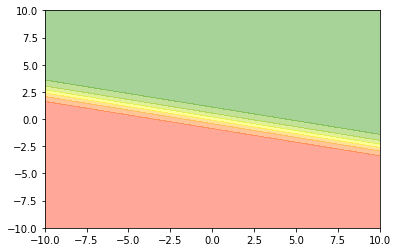

In [ ]:
plt.contourf( XX1,XX2,Y,cmap=my_cmap,alpha=0.4)
plt.show()

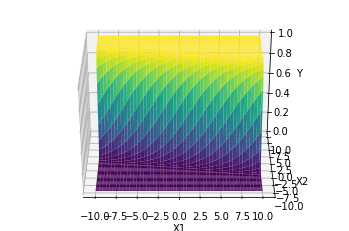

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

ax.view_init(30,270)

#Compute Loss for a given Dataset

In [ ]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X,w_unknown,b_unknown)

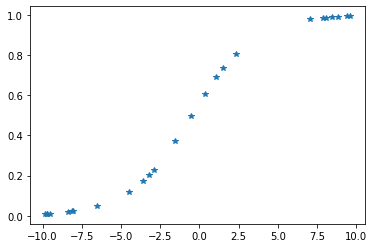

In [ ]:
plt.plot(X,Y,'*')
plt.show()

In [ ]:
def calculate_loss(X,Y,w_est,b_est):
  loss = 0
  for x,y in zip(X,Y):
    loss += (y - sigmoid(x,w_est,b_est))**2
  return loss

In [ ]:
W = np.linspace(0,2,100)
B = np.linspace(-1,1,100)

WW , BB = np.meshgrid(W,B)

Loss = np.zeros(WW.shape)

In [ ]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = calculate_loss(X , Y , WW[i,j] , BB[i,j])

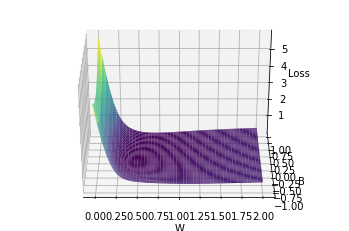

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')

ax.view_init(30,270)

In [ ]:
ij = np.argmin(Loss)
i = int(np.floor(ij / Loss.shape[0]))
j = int(ij - (i * Loss.shape[1]))
print(i,j)

62 25


In [ ]:
print(WW[i,j],BB[i,j])

0.5050505050505051 0.2525252525252526


#Class for Sigmoid Neuron

In [ ]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self,x):
    return np.dot(x,self.w.T) + self.b

  def sigmoid(self,x):
    return 1.0/(1.0 + np.exp(-x))

  def grad_w(self, x ,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x

  def grad_b(self, x ,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)

  def fit(self , X, Y, epochs=1, lr=1, initialise=True):

    #initialize w,b
    if initialise:
      self.w = np.random.rand(1,X.shape[1])
      self.b = 0

    for i in range(epochs):
      dw = 0
      db = 0
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -= dw * lr
      self.b -= db * lr

# Fitting to Toy dataset

In [ ]:
X = np.asarray([[2.5,2.5] , [4,-1] , [1,-4] , [-3,1.25] , [-2,-4] , [1,5]])
Y = [1,1,1,0,0,0]

In [ ]:
sn = SigmoidNeuron()
sn.fit(X,Y,1,0.5,True)

In [ ]:
def plot_sn(X,Y,sn,ax):
  X1 = np.linspace( -10, 10 , 100)
  X2 = np.linspace( -10, 10 , 100)
  
  XX1,XX2 = np.meshgrid(X1,X2)
  YY = np.zeros(XX1.shape)

  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([[X1[j],X2[i]]])
      YY[i,j] = sn.sigmoid(sn.perceptron(val))

  ax.contourf(XX1,XX2,YY,cmap=my_cmap,alpha=0.4)
  ax.scatter(X[:,0],X[:,1],c=Y,cmap=my_cmap)
  ax.plot()

[[0.09352252 0.18228082]] [0.00146447]
[[ 0.65333632 -0.39496347]] [0.00668036]
[[ 0.88878113 -0.1290817 ]] [-0.03994084]
[[ 0.89813477 -0.44604312]] [-0.10277641]
[[ 1.06926519 -0.23200882]] [-0.14891788]
[[ 1.07461691 -0.45219947]] [-0.20517496]
[[ 1.18860793 -0.32713708]] [-0.2450323]
[[ 1.20959349 -0.44015579]] [-0.28851098]
[[ 1.27738863 -0.40016399]] [-0.32215767]
[[ 1.31147075 -0.44125934]] [-0.35569666]
[[ 1.35550619 -0.44295254]] [-0.38504622]
[[ 1.3912927  -0.45872255]] [-0.41279007]
[[ 1.42625842 -0.4688631 ]] [-0.43838437]
[[ 1.4585656  -0.47953224]] [-0.46231409]
[[ 1.48899941 -0.48932053]] [-0.48470292]
[[ 1.51767305 -0.49858082]] [-0.50572567]
[[ 1.54478227 -0.50733247]] [-0.52552008]
[[ 1.57048122 -0.5156293 ]] [-0.5442071]
[[ 1.59490386 -0.52351444]] [-0.56189175]
[[ 1.61816633 -0.53102542]] [-0.57866571]


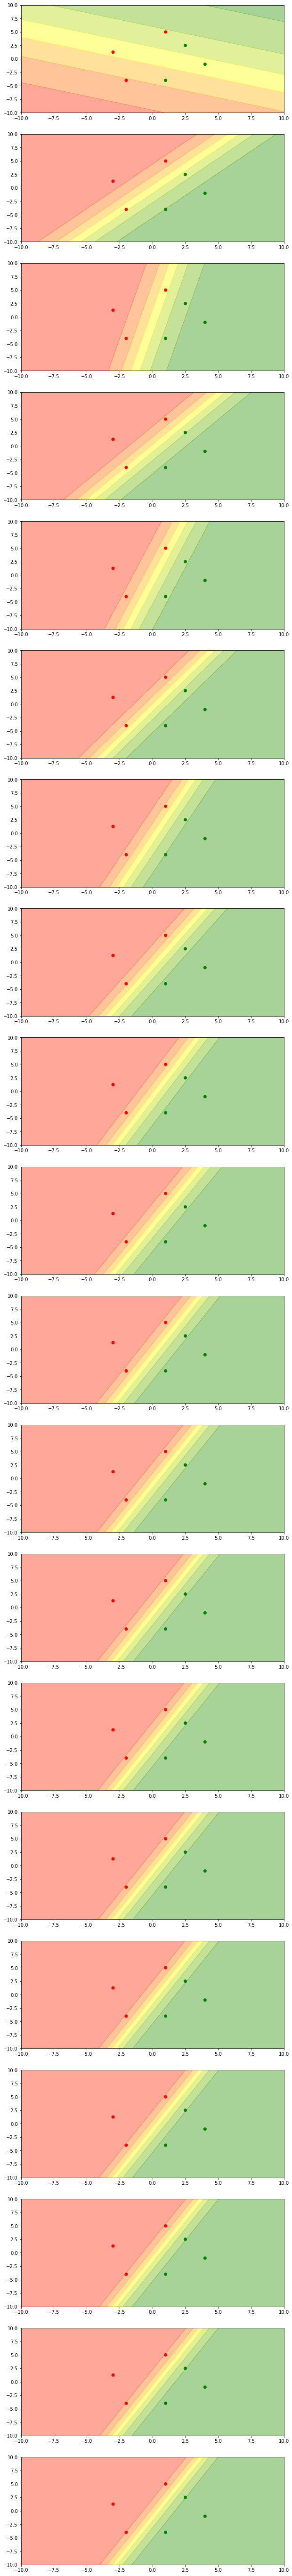

In [ ]:
sn.fit(X,Y,1,0.05,True)
N = 20
plt.figure(figsize=(10,N*5)) 
for i in range(N):
  print(sn.w,sn.b)
  ax = plt.subplot(N,1,i+1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,1,0.5,False)